<a href="https://colab.research.google.com/github/Ankushsingh806/python-project/blob/main/Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### **Import dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 1:- ML Appetizer/Day 7/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
data.shape

(8760, 14)

## **Exploratory data analysis (EDA)**

In [ ]:
df = data.copy()
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Relationship b/w Sessions and Rented Bike Count**

In [ ]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [ ]:
session_and_bke = df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
session_and_bke

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

<ipython-input-12-42ed788f067d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = session_and_bke, palette='viridis')


Text(0.5, 0, 'Seasons')

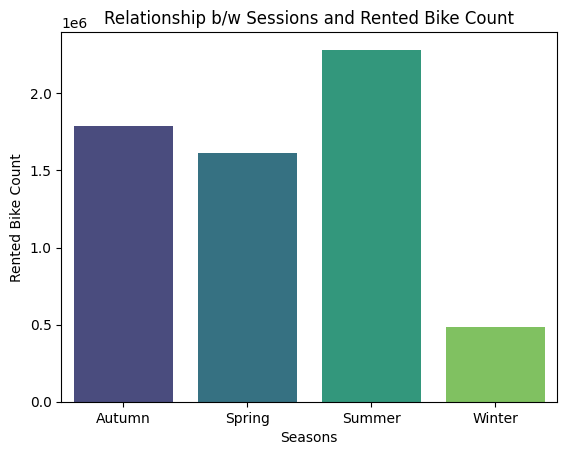

In [ ]:
a = sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = session_and_bke, palette='viridis')
a.set_title('Relationship b/w Sessions and Rented Bike Count')
a.set_ylabel('Rented Bike Count')
a.set_xlabel('Seasons')


### **Relationship b/w Holiday and Rented Bike Count**

In [ ]:
holiday_and_bke = df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
holiday_and_bke

Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419

<ipython-input-14-e3fed7798517>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x = 'Holiday', y = 'Rented Bike Count', data = holiday_and_bke, palette='viridis')


Text(0.5, 0, 'Holiday')

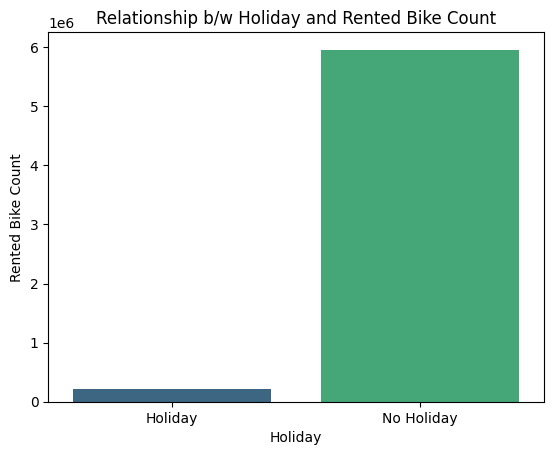

In [ ]:
a = sns.barplot(x = 'Holiday', y = 'Rented Bike Count', data = holiday_and_bke, palette='viridis')
a.set_title('Relationship b/w Holiday and Rented Bike Count')
a.set_ylabel('Rented Bike Count')
a.set_xlabel('Holiday')

In [ ]:
holiday_and_bke = df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
holiday_and_bke

Seasons      Autumn   Spring   Summer  Winter
Holiday                                      
Holiday       91018    45742    49063   30072
No Holiday  1698984  1566167  2234171  457097

Text(0, 0.5, 'Rented Bike Count')

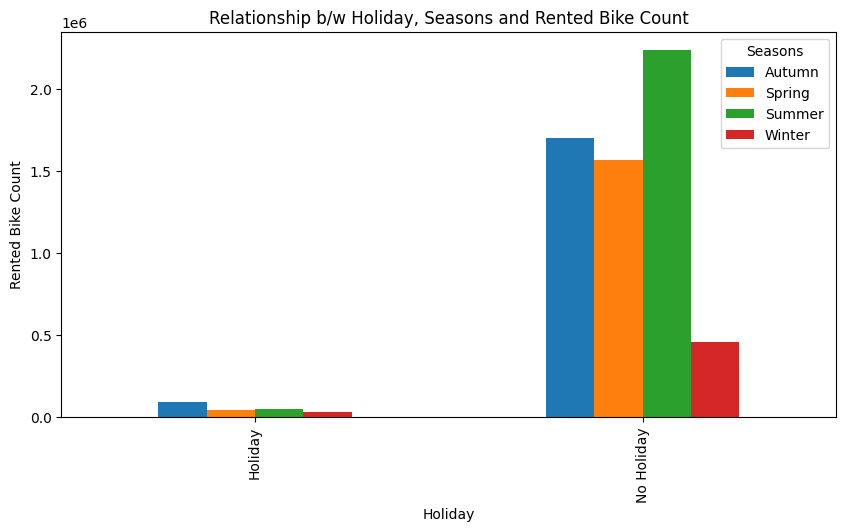

In [ ]:
holiday_and_bke.plot(kind='bar', figsize=(10,5))
plt.title('Relationship b/w Holiday, Seasons and Rented Bike Count')
plt.ylabel('Rented Bike Count')

### **Relationship b/w 'Humidity(%)' and Seasons**

In [ ]:
rel_sess_hum = df.groupby('Seasons')\
                 .agg(Humidity_min = ('Humidity(%)','min'),
                      Humidity_max = ('Humidity(%)','max'),
                      Humidity_mean = ('Humidity(%)','mean'))
rel_sess_hum

Humidity_min  Humidity_max  Humidity_mean
Seasons                                           
Autumn             13            97      59.228480
Spring              0            98      58.776721
Summer             21            98      64.981431
Winter             14            97      49.744907

<ipython-input-18-5f4e259cec82>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasons', y = 'Humidity_mean', data = rel_sess_hum, palette='viridis')


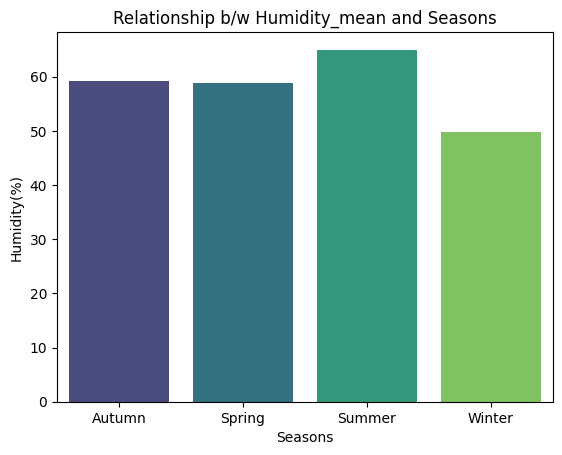

<ipython-input-18-5f4e259cec82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasons', y = 'Humidity_max', data = rel_sess_hum, palette='viridis')


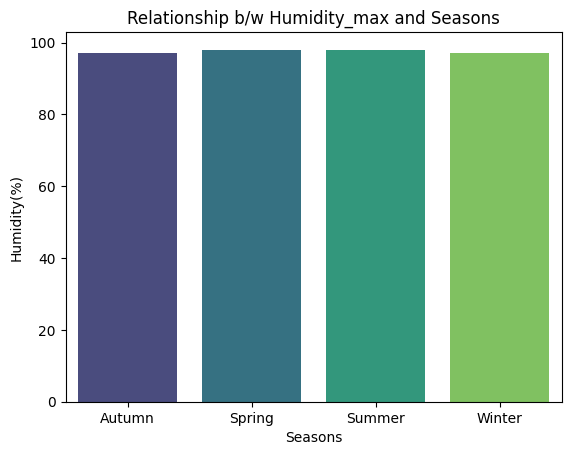

<ipython-input-18-5f4e259cec82>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Seasons', y = 'Humidity_min', data = rel_sess_hum, palette='viridis')


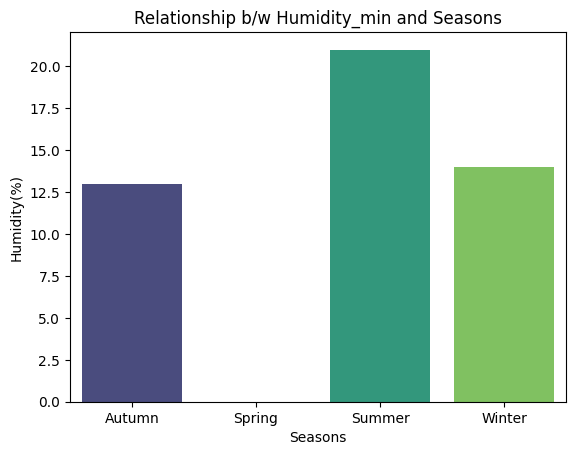

In [ ]:
sns.barplot(x = 'Seasons', y = 'Humidity_mean', data = rel_sess_hum, palette='viridis')
plt.title('Relationship b/w Humidity_mean and Seasons')
plt.ylabel('Humidity(%)')
plt.show()
sns.barplot(x = 'Seasons', y = 'Humidity_max', data = rel_sess_hum, palette='viridis')
plt.title('Relationship b/w Humidity_max and Seasons')
plt.ylabel('Humidity(%)')
plt.show()
sns.barplot(x = 'Seasons', y = 'Humidity_min', data = rel_sess_hum, palette='viridis')
plt.title('Relationship b/w Humidity_min and Seasons')
plt.ylabel('Humidity(%)')
plt.show()

Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

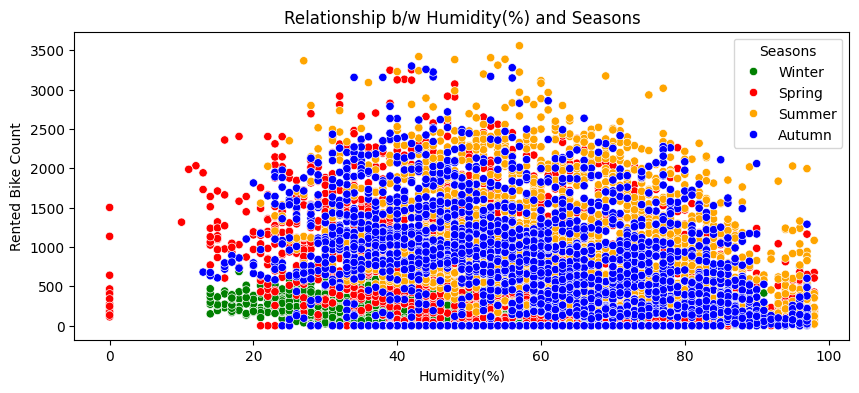

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Humidity(%)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

### **Temperature, rented bike count for diffrent seasons**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
rel_sess_hum = df.groupby('Seasons')\
                 .agg(Temperature_min = ('Temperature(°C)','min'),
                      Temperature_max = ('Temperature(°C)','max'),
                      Temperature_mean = ('Temperature(°C)','mean'))
rel_sess_hum

Temperature_min  Temperature_max  Temperature_mean
Seasons                                                    
Autumn              -3.0             30.5         14.120833
Spring              -6.6             29.4         13.046694
Summer              16.3             39.4         26.582790
Winter             -17.8             10.3         -2.540463

Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

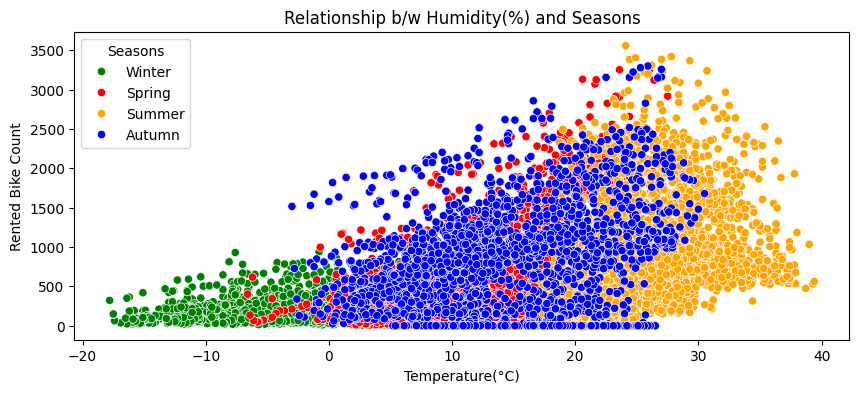

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Temperature(°C)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Hour Rented Bike Count for diffrent Seasons**

In [ ]:
bike_hour = df.groupby('Hour')['Rented Bike Count'].sum().reset_index()
bike_hour

Hour  Rented Bike Count
0      0             197633
1      1             155557
2      2             110095
3      3              74216
4      4              48396
5      5              50765
6      6             104961
7      7             221192
8      8             370731
9      9             235784
10    10             192655
11    11             219311
12    12             255296
13    13             267635
14    14             276971
15    15             302653
16    16             339677
17    17             415556
18    18             548568
19    19             436229
20    20             390172
21    21             376479
22    22             336821
23    23             244961

<ipython-input-25-ee2781e25585>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Hour', y = 'Rented Bike Count', data = bike_hour, palette='Accent')


Text(0.5, 1.0, 'Hour Rented Bike Count for diffrent Seasons')

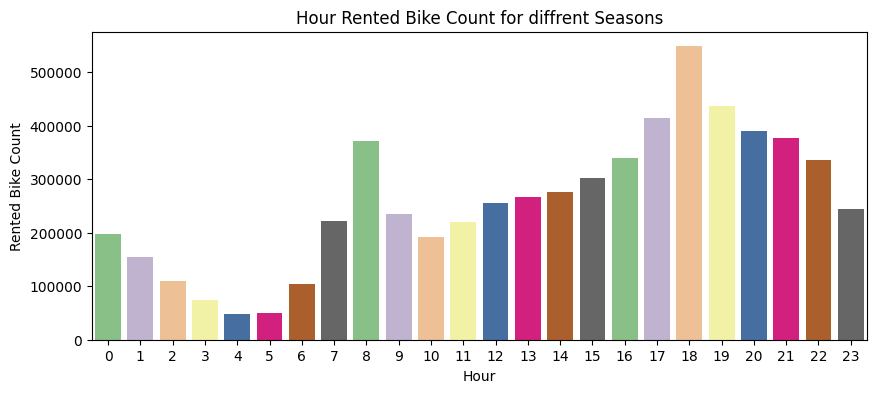

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Hour', y = 'Rented Bike Count', data = bike_hour, palette='Accent')
plt.title('Hour Rented Bike Count for diffrent Seasons')


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Wind Speed

Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

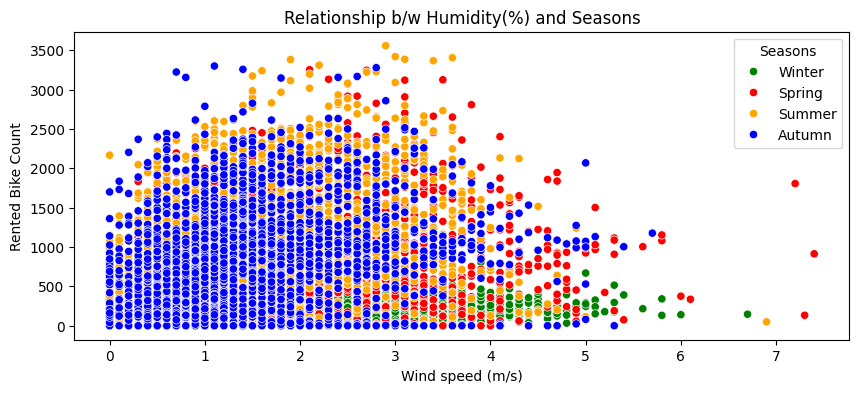

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Wind speed (m/s)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

### **Visibility**

Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

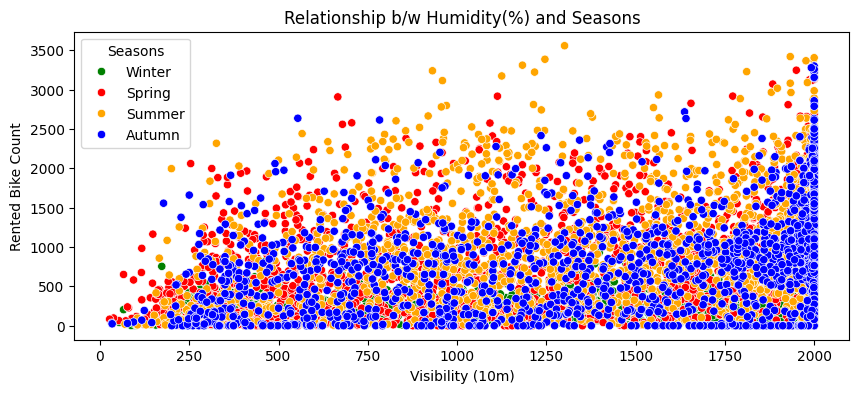

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Visibility (10m)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

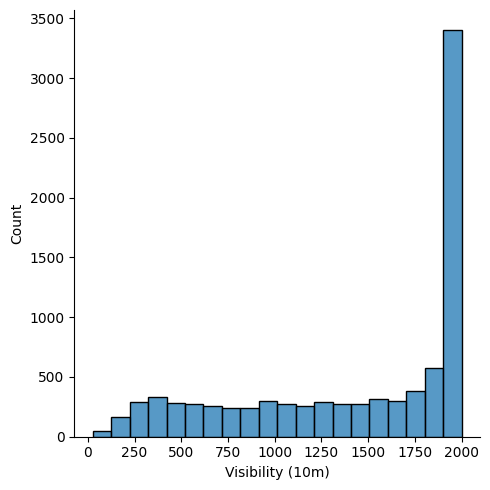

In [ ]:
sns.displot(data,x = 'Visibility (10m)')

### **Rainfall**


Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

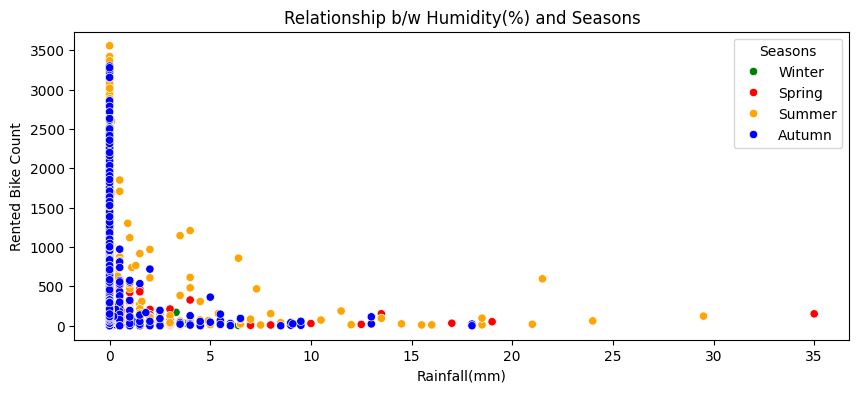

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **snowfall**


Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

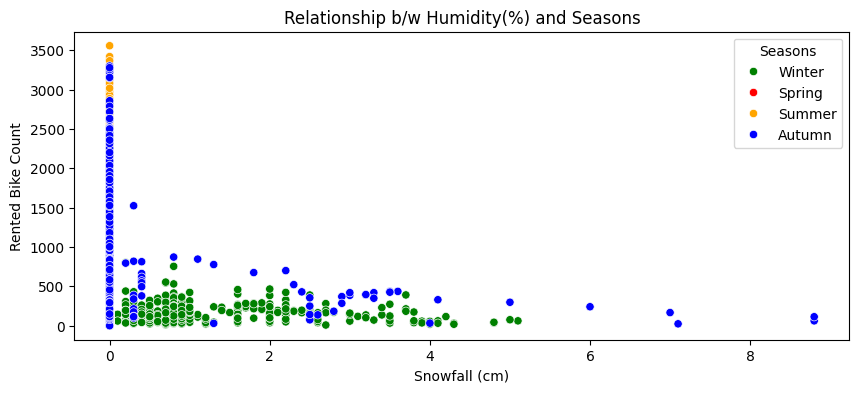

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Solar Radiation (MJ/m2)**


Text(0.5, 1.0, 'Relationship b/w Humidity(%) and Seasons')

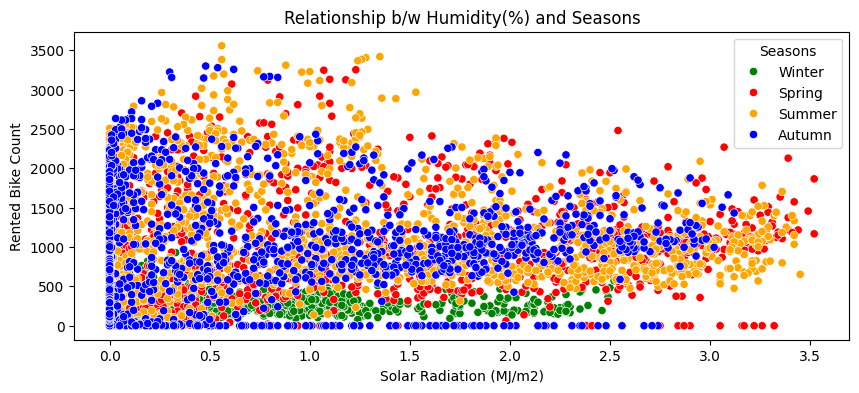

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count', data = df, palette=['green','red','orange','blue'],hue = 'Seasons')
plt.title('Relationship b/w Humidity(%) and Seasons')

In [ ]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

<Axes: xlabel='Functioning Day'>

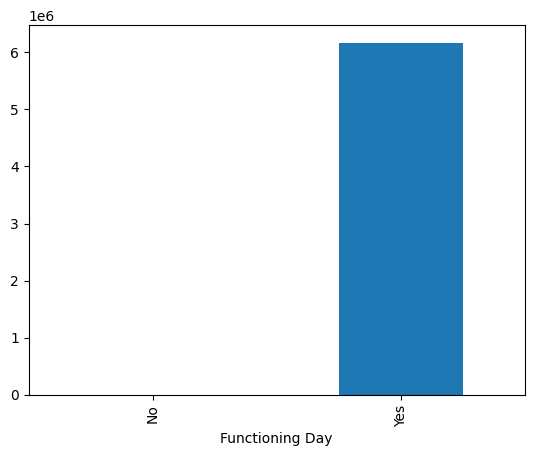

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum().plot(kind = 'bar')

### **Date**

In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df['Date'][0]

'01/12/2017'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')

In [ ]:
df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['Date_month_no'] = df['Date'].dt.month
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Date_month_no  
0             Yes             12  
1             Yes             12  
2             Yes             12  
3             Yes             12  
4             Yes             12

In [ ]:
month_bike = df.groupby('Date_month_no')['Rented Bike Count'].sum().reset_index()
month_bike

Date_month_no  Rented Bike Count
0               1             150006
1               2             151833
2               3             380594
3               4             524227
4               5             707088
5               6             896887
6               7             734460
7               8             651887
8               9             673612
9              10             650675
10             11             465715
11             12             185330

<ipython-input-45-5d442c774c9d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Date_month_no',y = 'Rented Bike Count', data = month_bike, palette='Accent')


<Axes: xlabel='Date_month_no', ylabel='Rented Bike Count'>

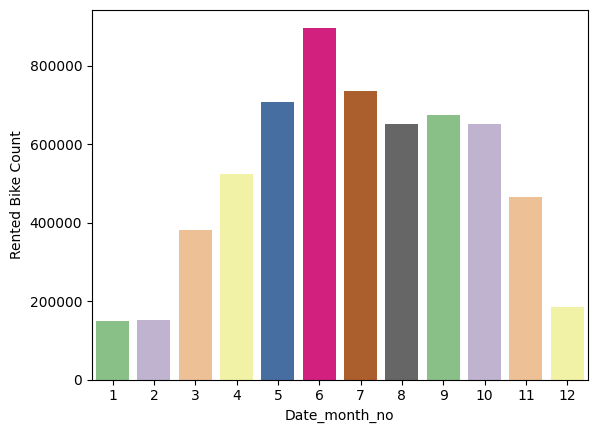

In [ ]:
sns.barplot(x = 'Date_month_no',y = 'Rented Bike Count', data = month_bike, palette='Accent')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Date_month_no'],
      dtype='object')

### **Rented Bike Count**

<Figure size 1000x400 with 0 Axes>

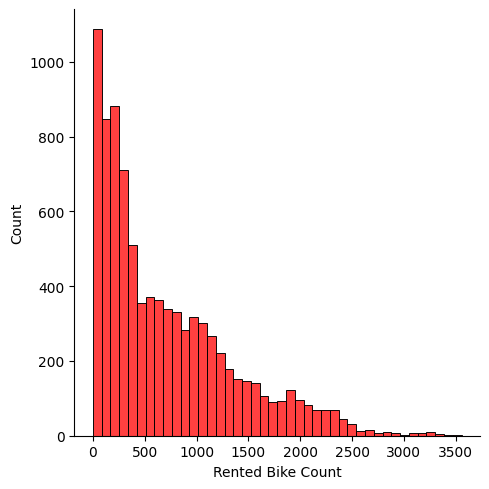

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df['Rented Bike Count'],color = 'r')

## **Feature Engineering**

In [ ]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Date_month_no'],
      dtype='object')

### **Hustogram plot**

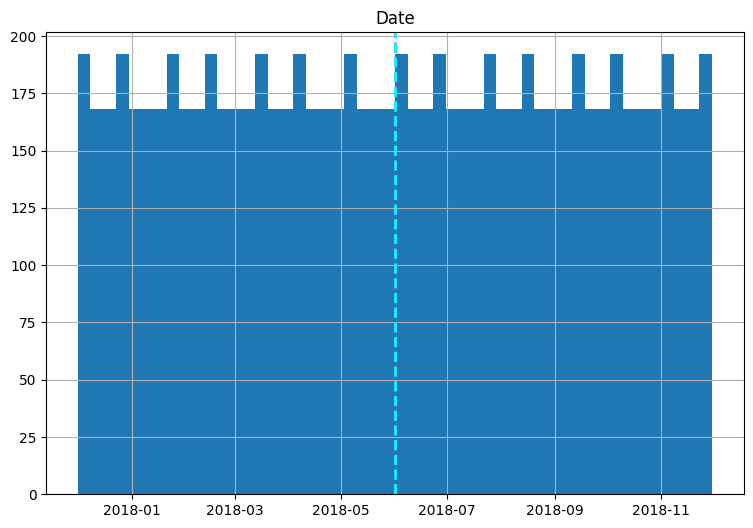

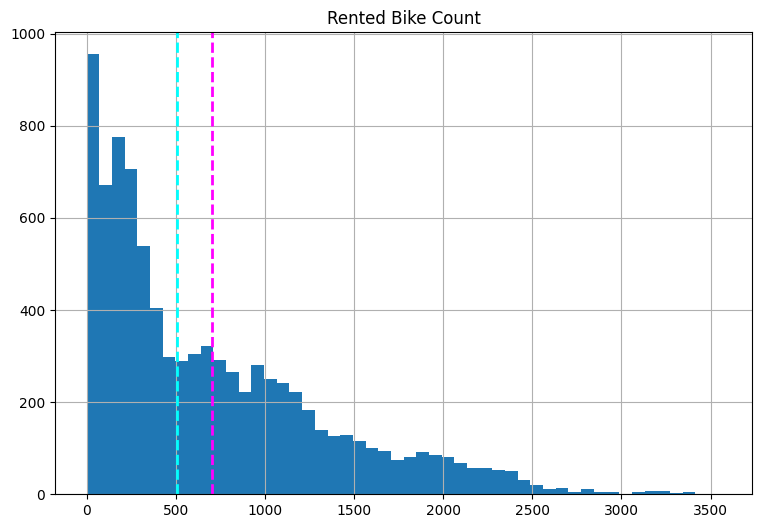

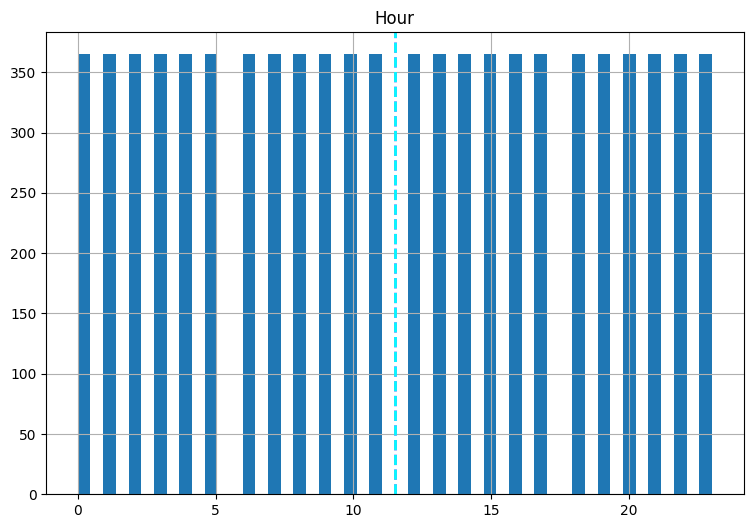

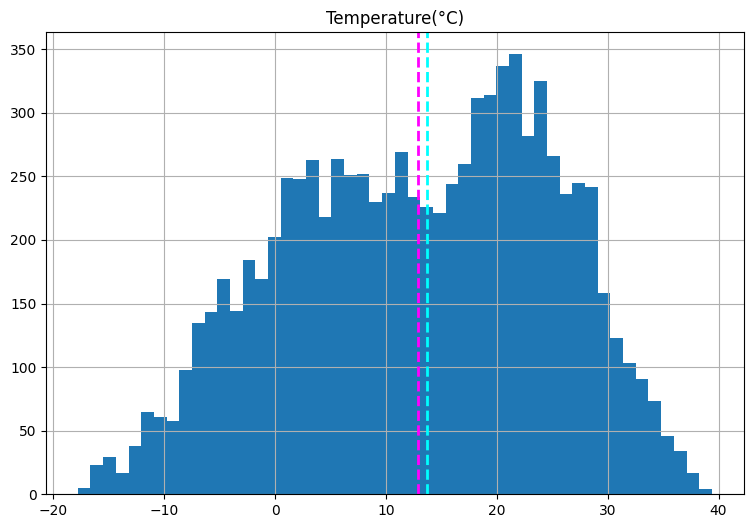

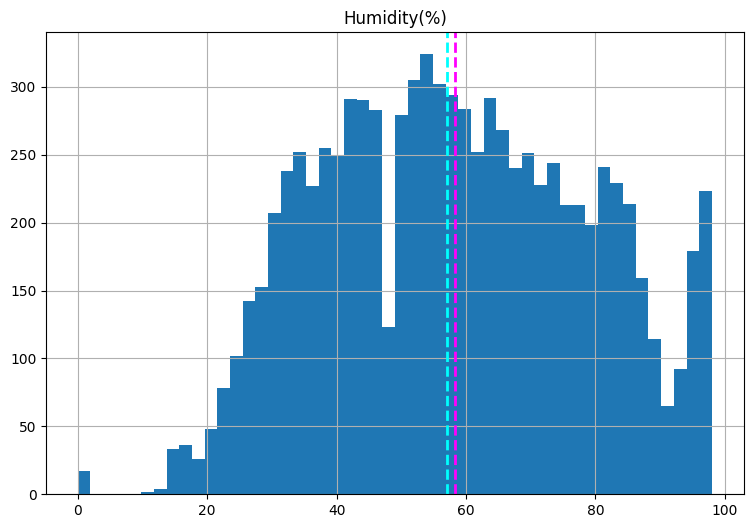

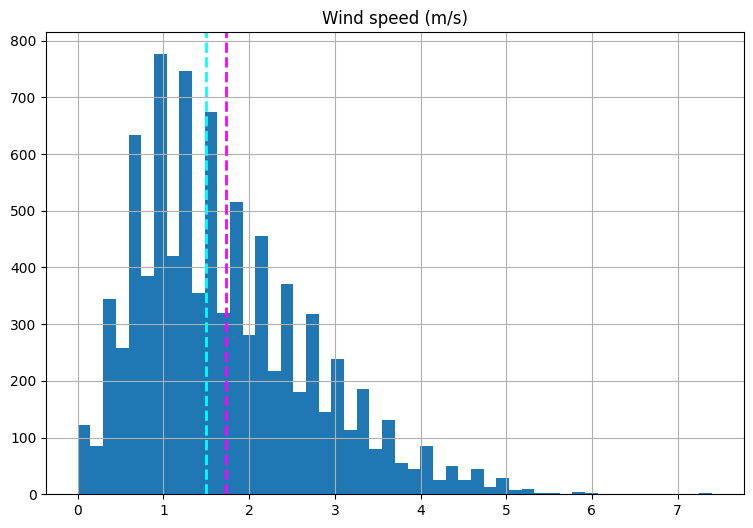

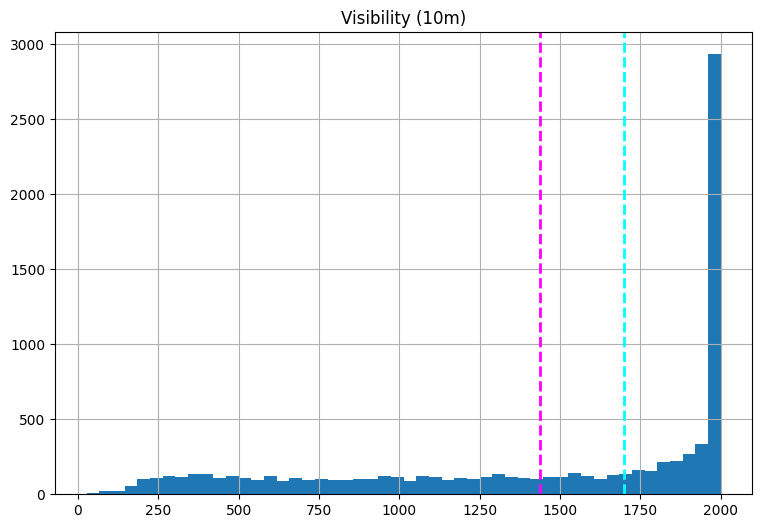

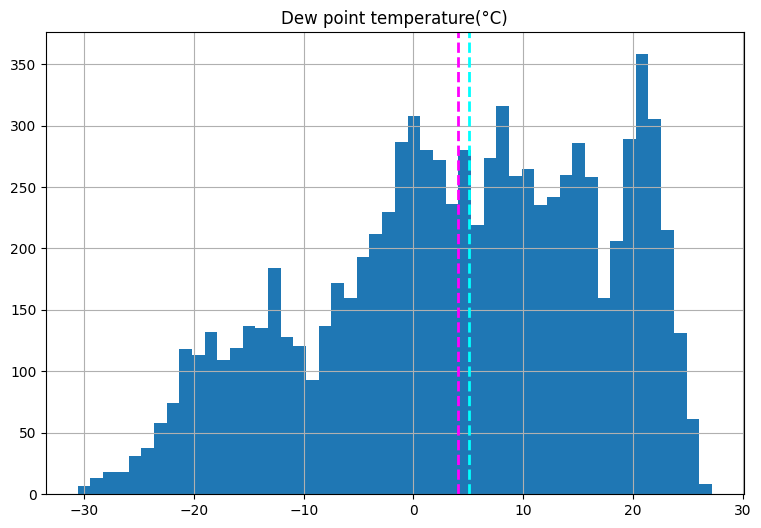

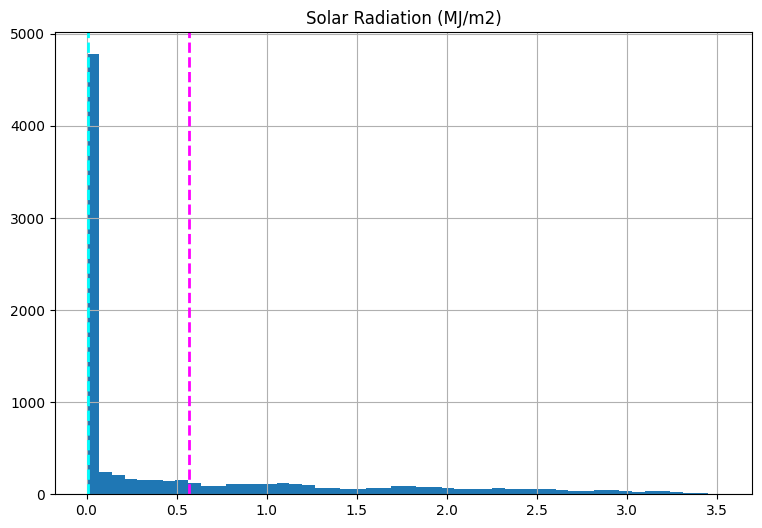

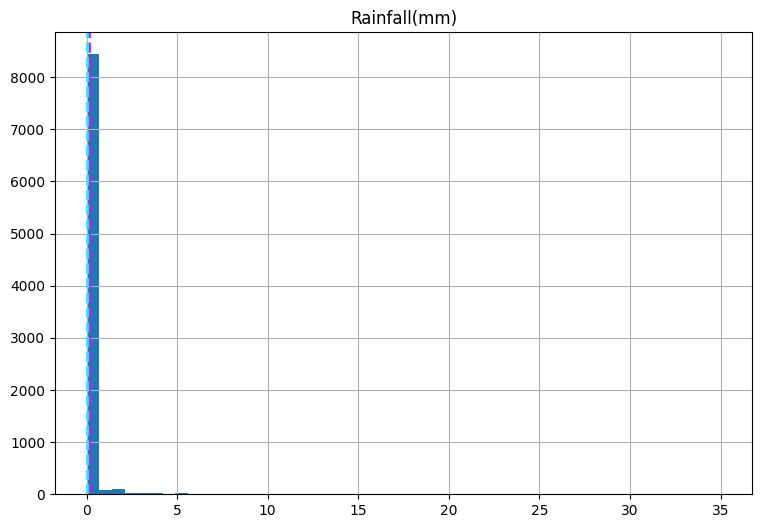

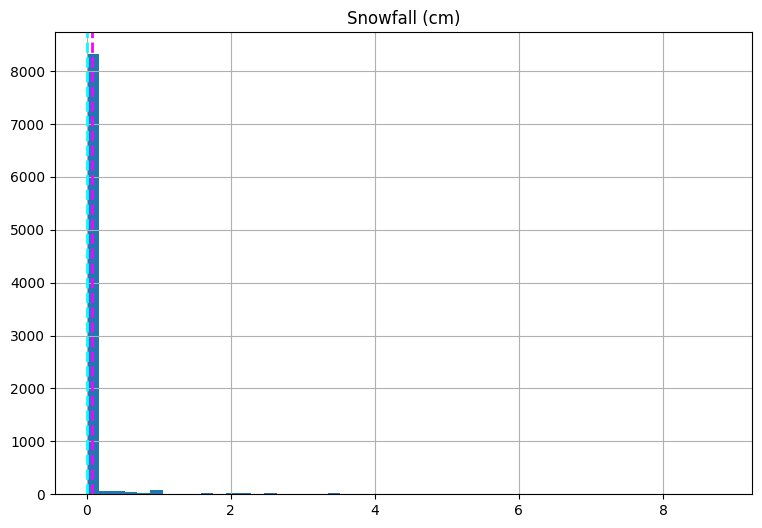

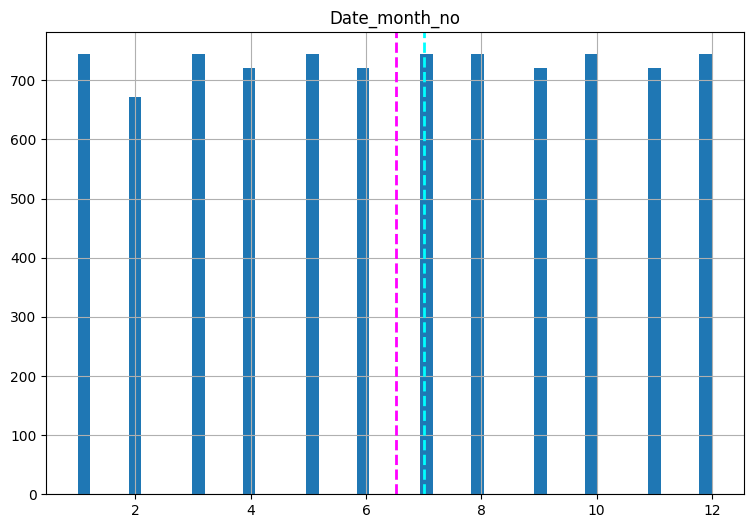

In [ ]:
for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### **Correlaion & Scatter plot 'Rented bike count**

## **Pair plot**


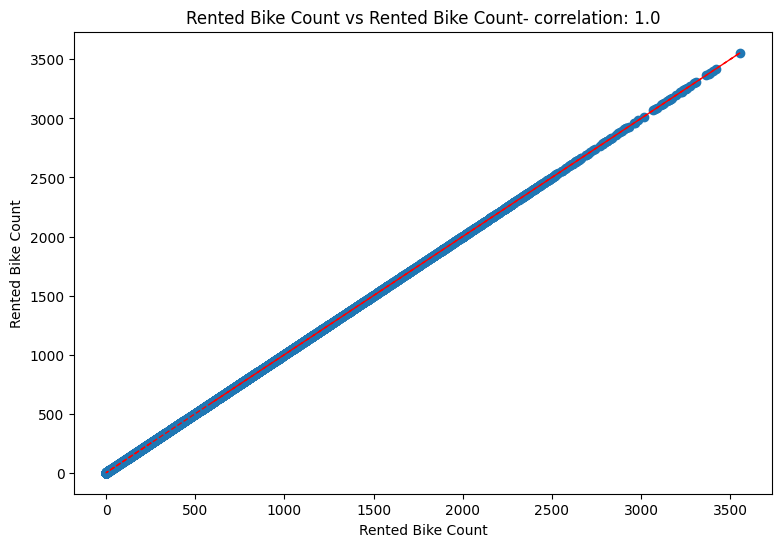

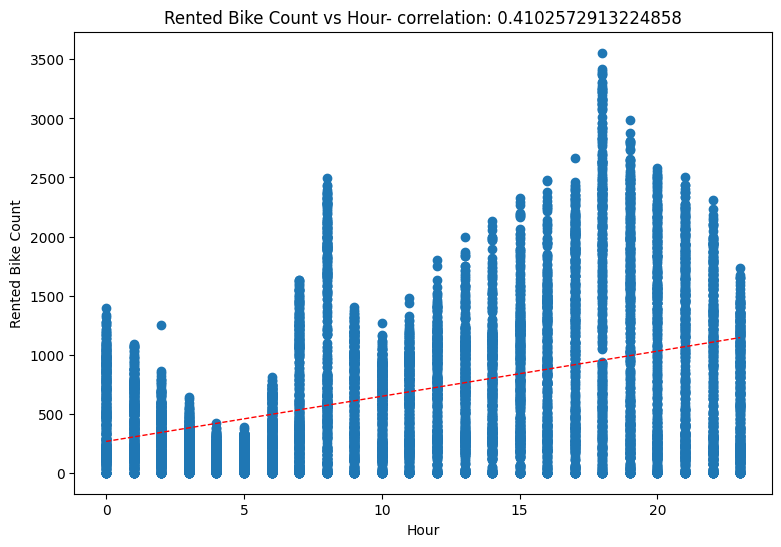

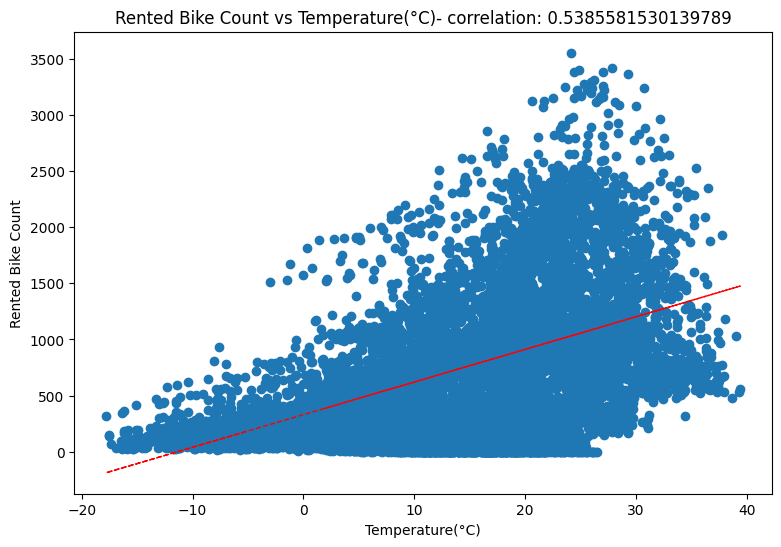

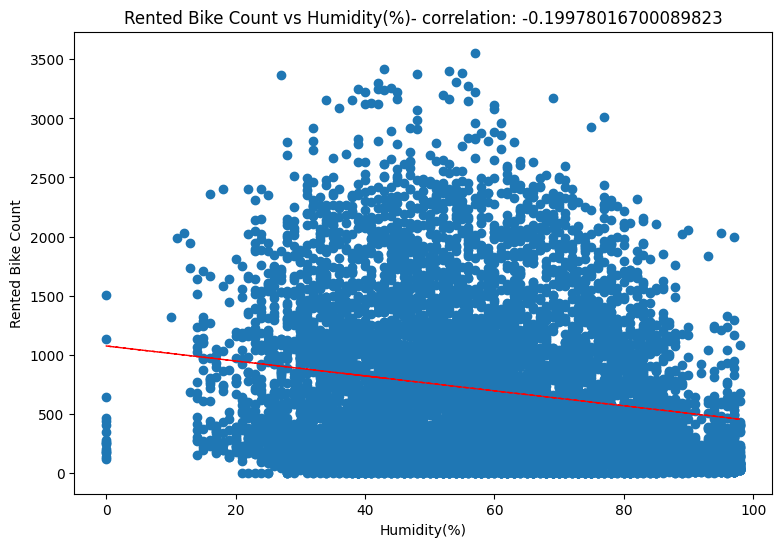

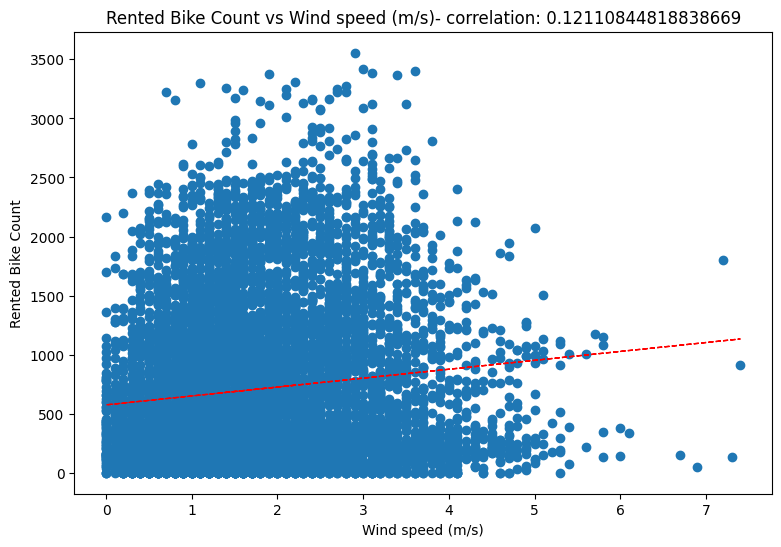

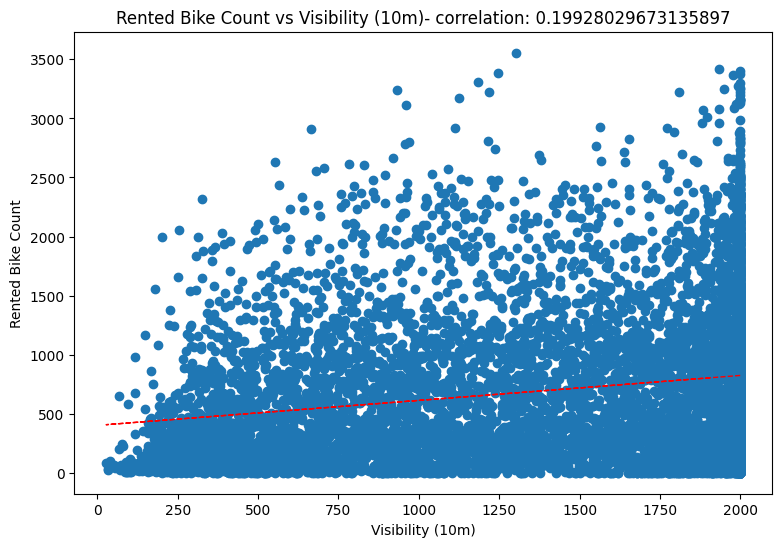

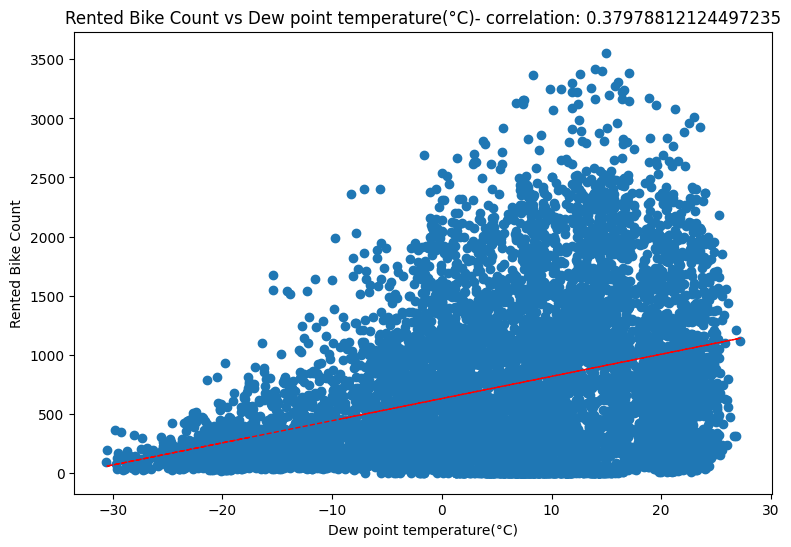

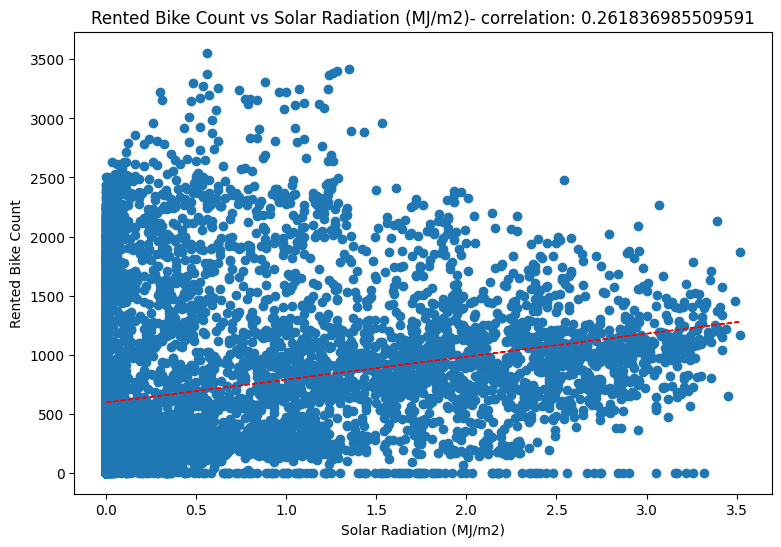

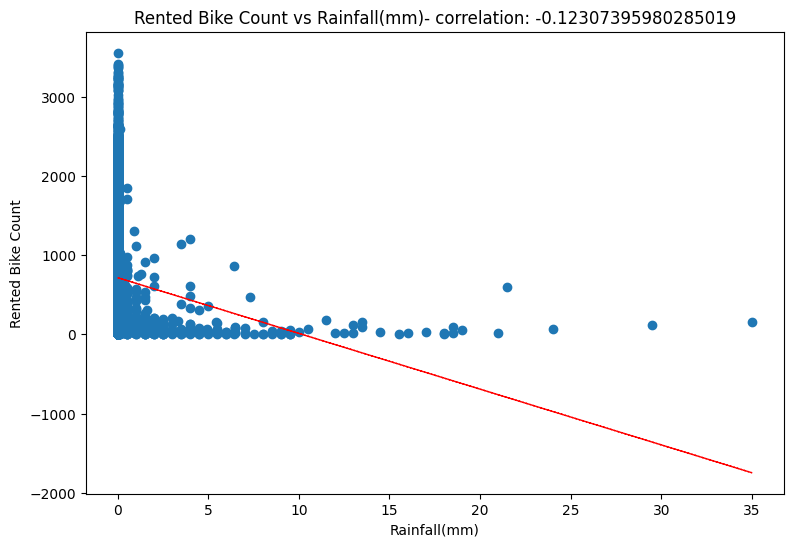

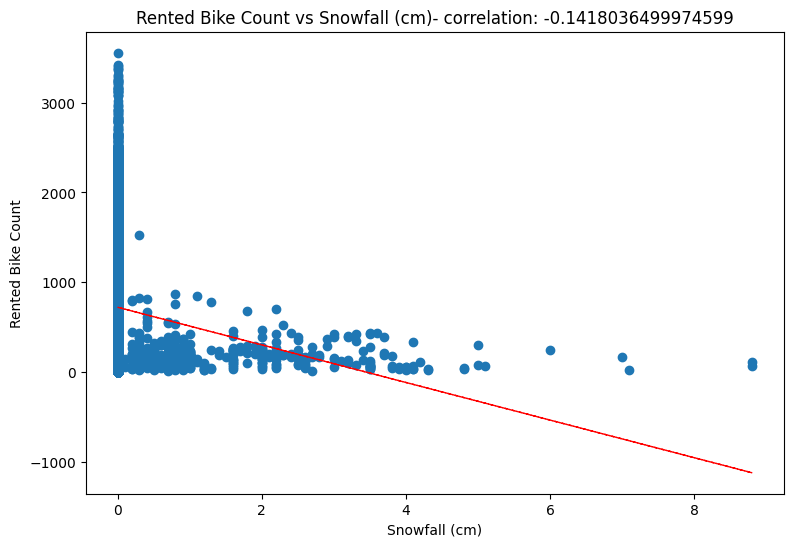

In [ ]:
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, 'r--', lw=1)

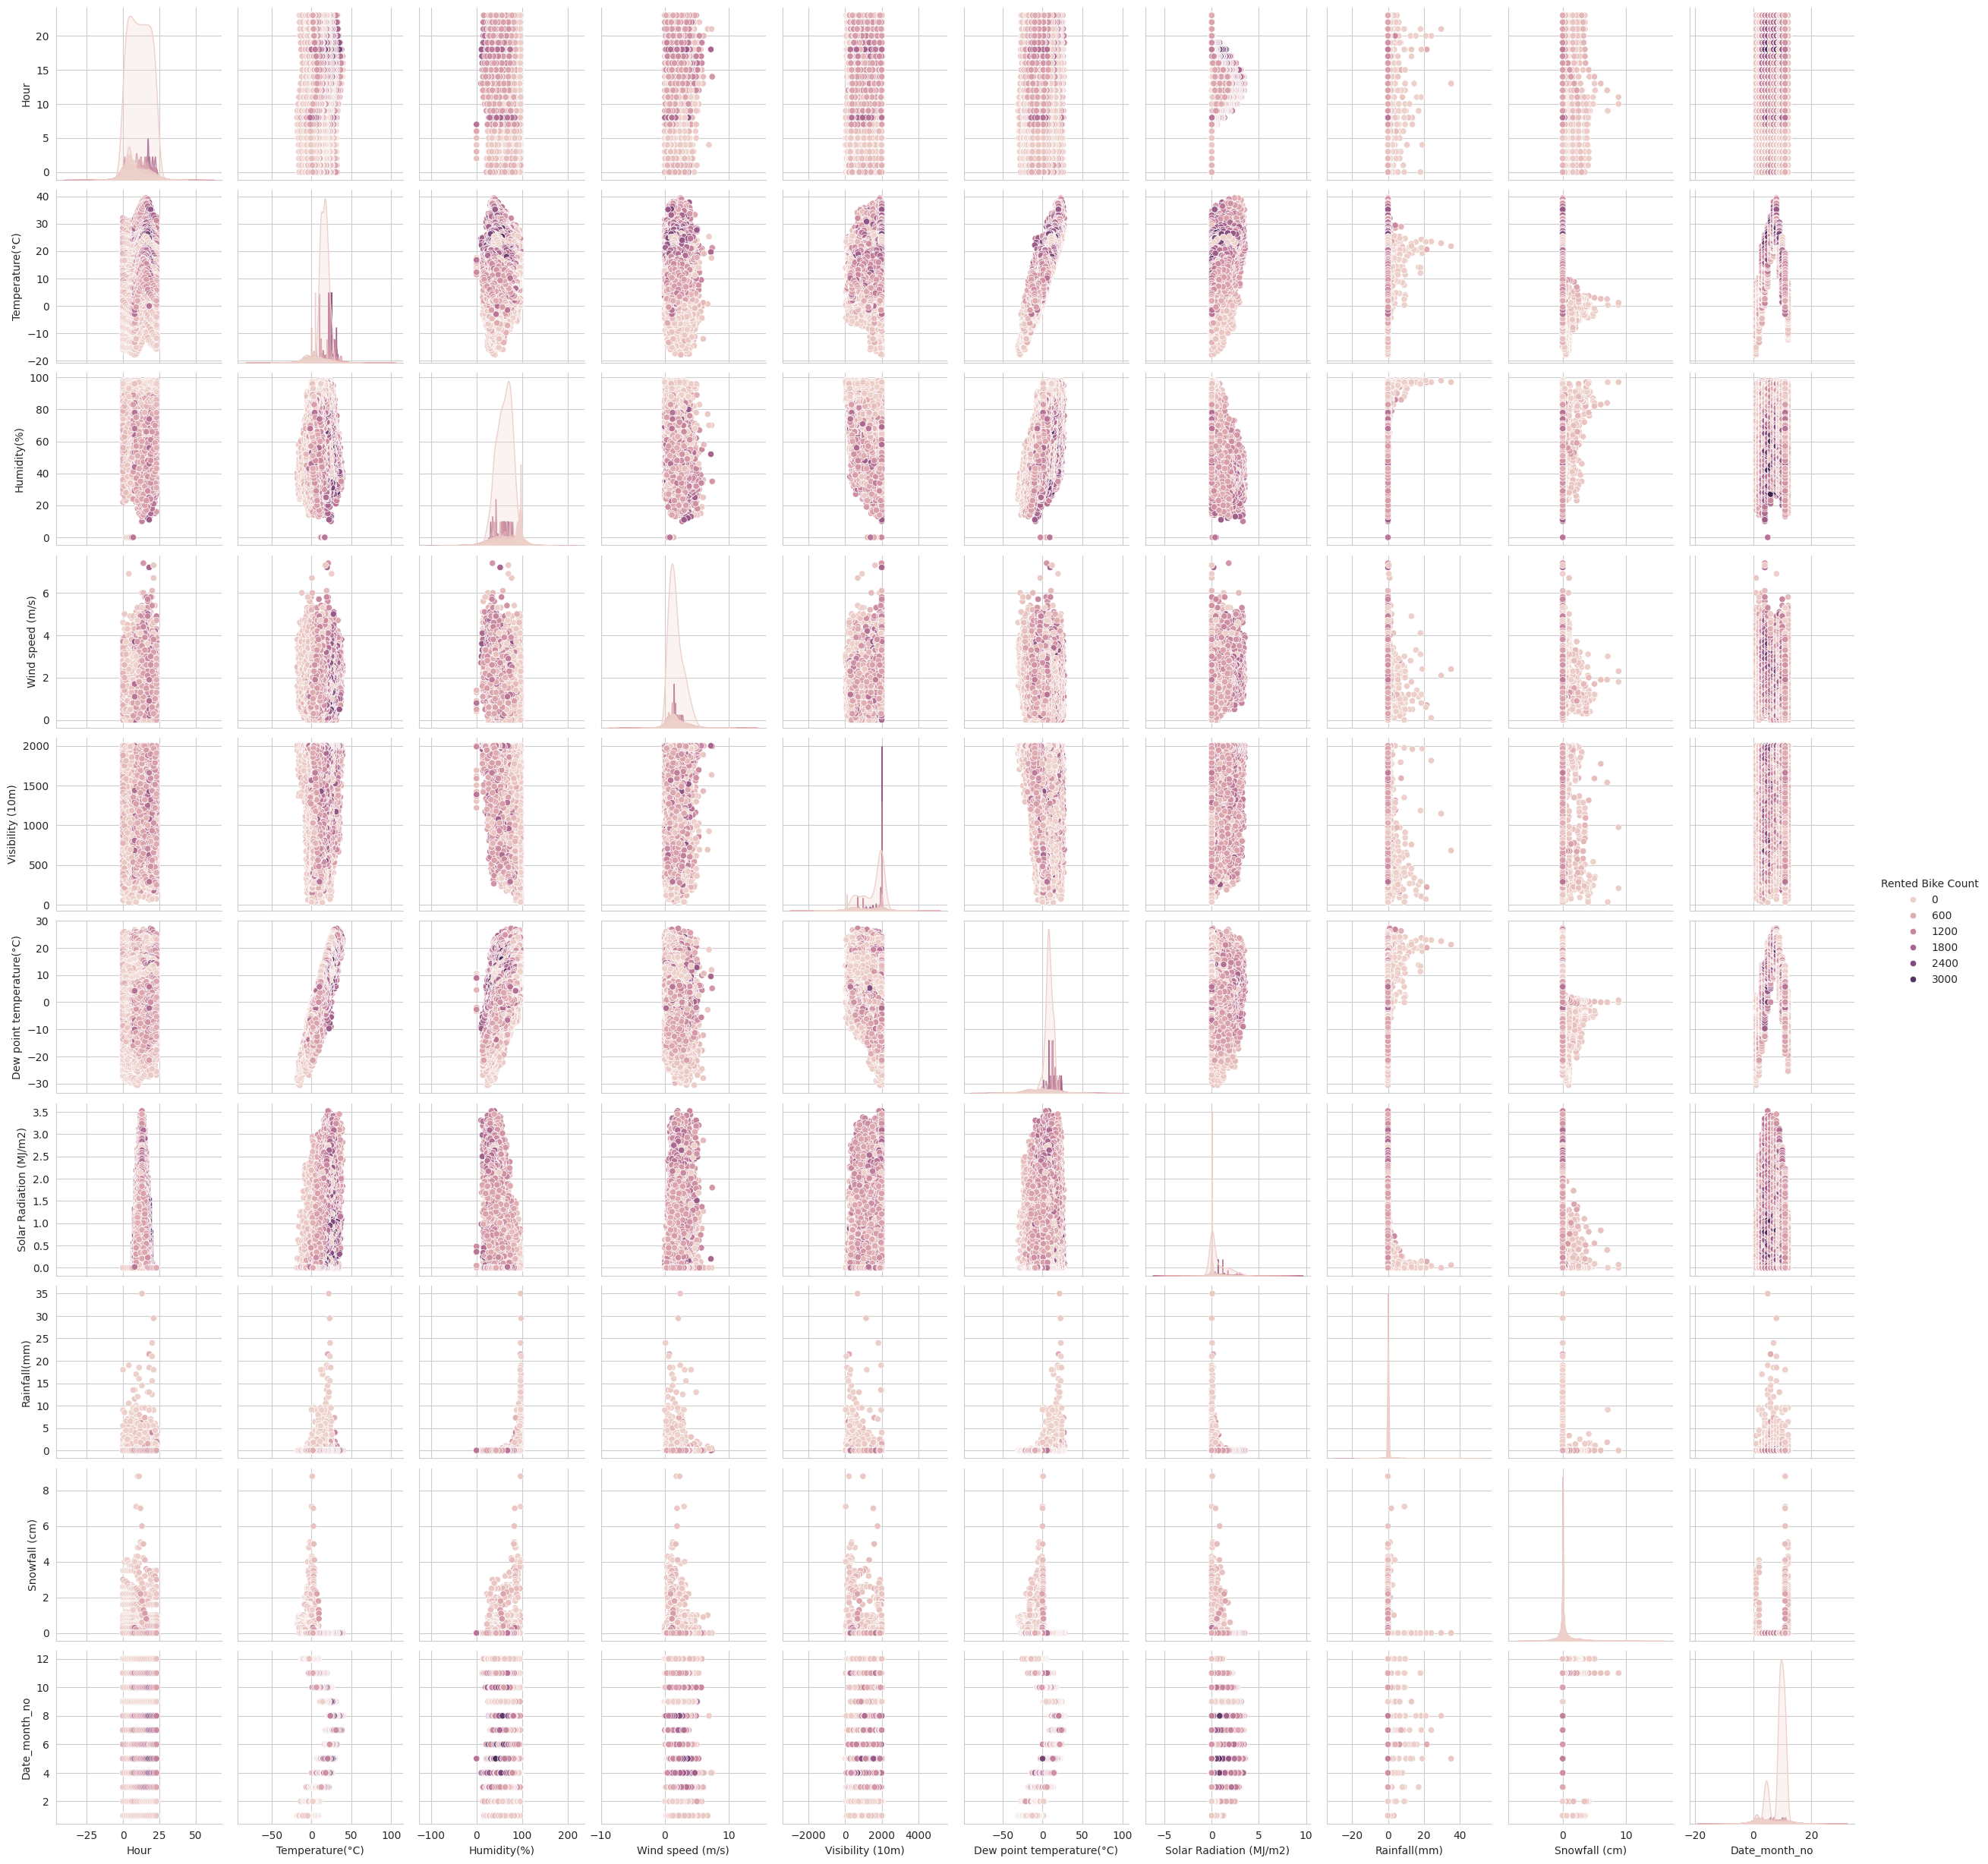

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Rented Bike Count')

### **Feature incoding and creation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['day_of_week'] = df['Date'].dt.day_name()

df['month'] = df['Date'].dt.month_name()

df['year'] = df['Date'].map(lambda x:x.year).astype('object')
df.drop(columns=['Date','Date_month_no'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

In [ ]:
df['day_of_week'].value_counts()

day_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [ ]:
df['week'] = df['day_of_week'].apply(lambda x:'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekdays')
df['week'].value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

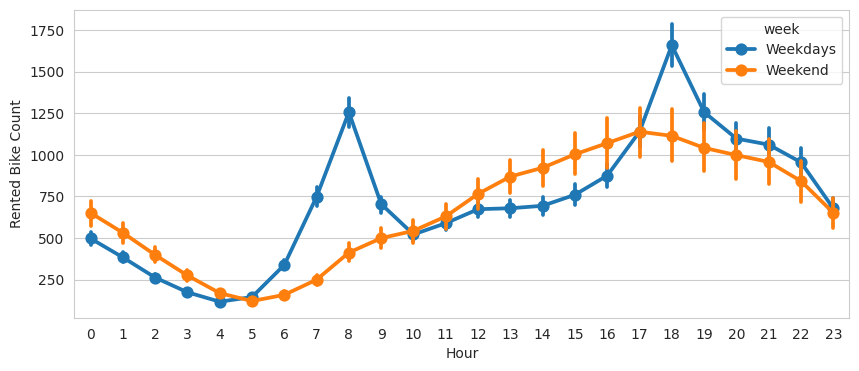

In [ ]:
plt.figure(figsize=(10,4))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'], hue= df['week'])

In [ ]:
df.drop(columns = ['day_of_week'], inplace = True)

In [ ]:
df['Hour'].value_counts()

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64

In [ ]:
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h>=7 and h <=10:
    return 'Morning'
  elif h>=11 and h <=16:
    return 'Noon'
  else:
    return 'Night'

In [ ]:
df['Hour'] = df['Hour'].apply(hour)
df['Hour'].value_counts()

Hour
Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: count, dtype: int64

### **Correlation**

In [ ]:
int_columns_df = df.select_dtypes(include = ['int64','float64'])
int_columns_df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [ ]:
int_columns_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

<Axes: >

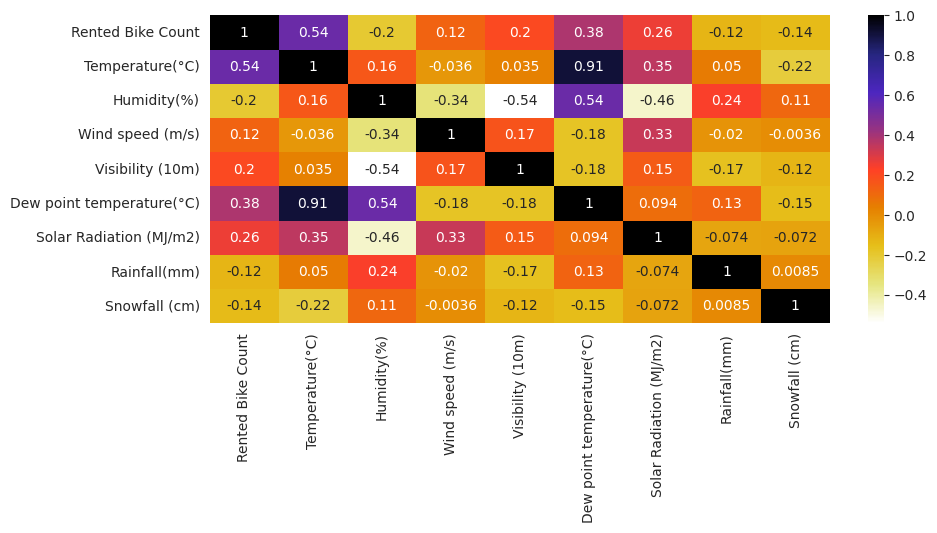

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(int_columns_df.corr(), annot = True, cmap = plt.cm.CMRmap_r)

### **Chacking for variacian inflation fector**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

### **Feature Scling**



In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'week'],
      dtype='object')

In [ ]:
gender
male
female
other

NameError: name 'gender' is not defined

In [ ]:
gender_female   gender_other
0               0
1               0
0               1



In [ ]:
new_df = pd.get_dummies(df, drop_first=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Hour_Morning               8760 non-null   bool   
 10  Hour_Night                 8760 non-null   bool   
 11  Hour_Noon                  8760 non-null   bool   
 12  Seasons_Spring             8760 non-null   bool   
 13  Seasons_Summer             8760 non-null   bool 

In [ ]:
X = new_df.drop(columns = ['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 28)
(2190, 28)
(6570,)
(2190,)


### **Transform the data**

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

yeo = PowerTransformer()
x_train = yeo.fit_transform(x_train)
x_test = yeo.transform(x_test)

## **Model Implementation**

### **Import dependancy**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [ ]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:

      # ploting the graph of feature importance

      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass

  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.7528304949500195
MAE : 4.8409982845180926
MSE : 38.178135932603446
RMSE : 6.178845841466143
R2 : 0.747741915753567
Adjusted R2 :  0.7444734167443582 

********************************************************************************
coefficient 
 [ 5.95508209 -1.62770952  0.2515433   0.5636376   0.72879401 -3.06033017
  0.07512372 -1.90288105 -5.19005315 -3.693359   -0.10264436 -0.29086177
 -0.99552432  0.67296183  5.36751057 -1.12073129 -0.06739495 -0.86094349
 -0.64704363 -0.42827696  1.11789926 -0.52207466  0.54913309  0.70144529
  1.10463537  0.32806082  0.06739495 -0.62810677]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


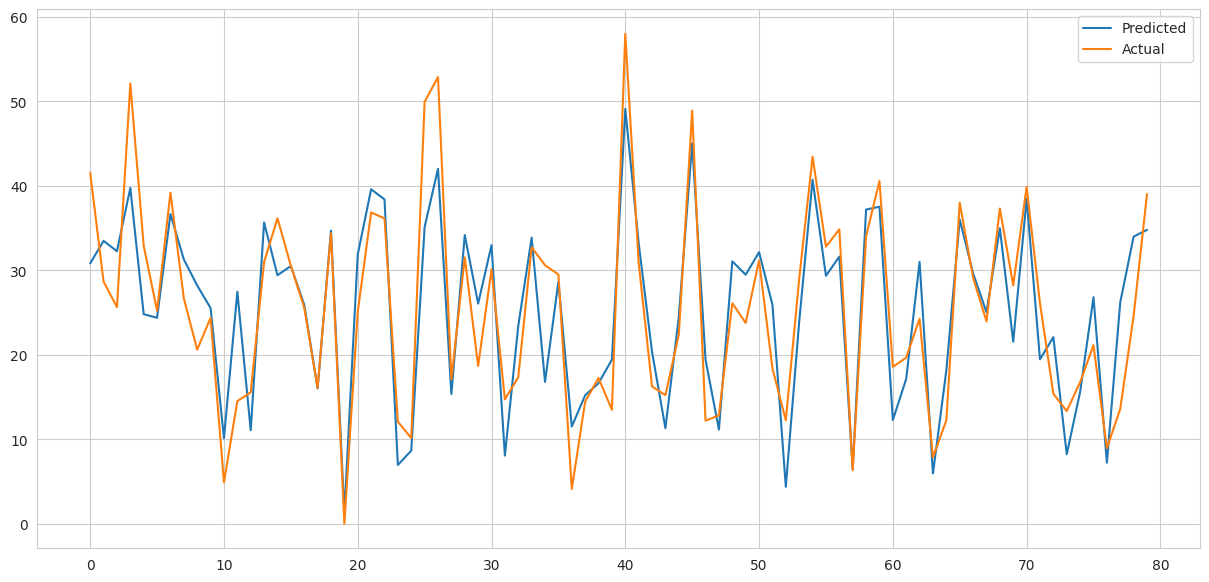

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+04, tolerance: 8.230e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+04, tolerance: 8.183e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.334e+04, tolerance: 8.195e

Training score  = 0.7528304949261196
The best parameters found out to be :{'alpha': 1e-05} 
where model best score is:  0.750435588930922 

MAE : 4.840996281654296
MSE : 38.178118532942186
RMSE : 6.178844433463444
R2 : 0.7477420307200291
Adjusted R2 :  0.7444735332004366 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


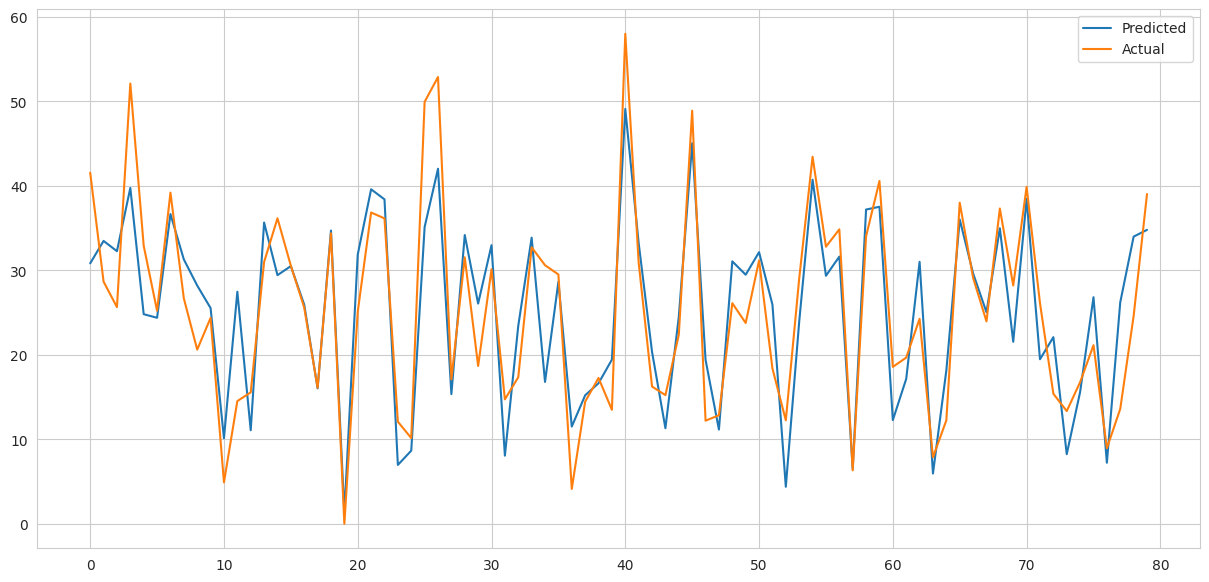

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

Training score  = 0.7528302715828596
The best parameters found out to be :{'alpha': 1.9} 
where model best score is:  0.750436106431931 

MAE : 4.840845216016073
MSE : 38.17595421957842
RMSE : 6.178669291973671
R2 : 0.7477563311967159
Adjusted R2 :  0.7444880189678904 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


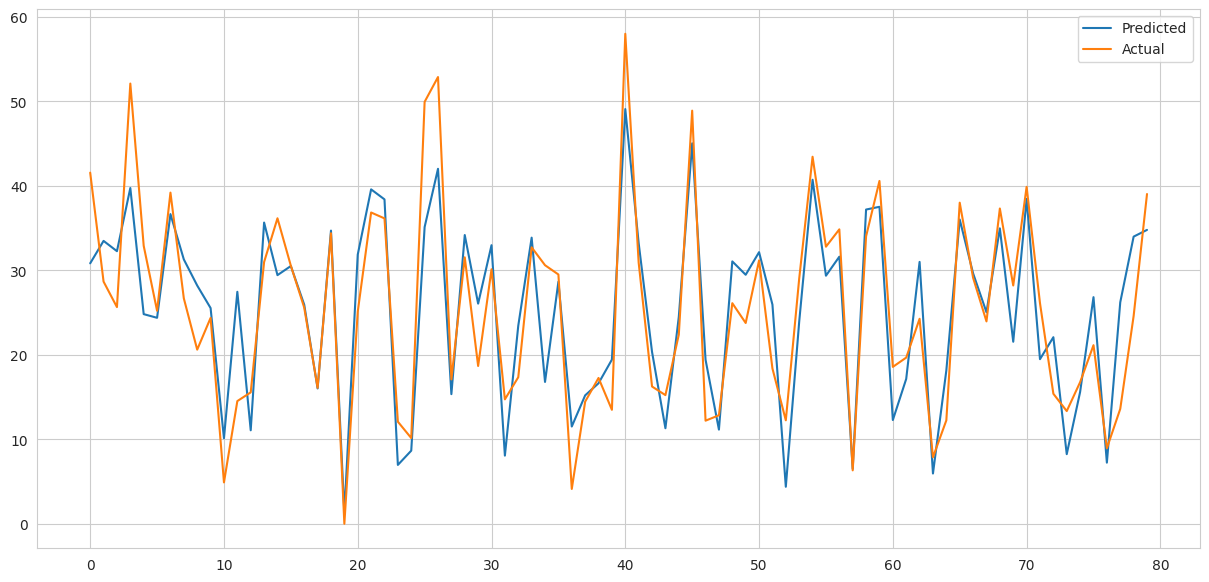

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [ ]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.transform(x_test)

#### **LinearRegression**

Training score  = 0.863959731549411
MAE : 3.528692122812998
MSE : 23.096340914731336
RMSE : 4.805865261816163
R2 : 0.8473933163594525
Adjusted R2 :  0.8095461627769905 

********************************************************************************
coefficient 
 [ 1.39082411e+08  4.47153918e+00 -2.07885247e+00  2.08677946e-01
  2.42503763e-01  1.33212689e+00 -2.07344553e+00  1.43512504e+11
 -1.42468940e+11  2.22662129e+11 -3.80070952e+11  2.75541730e+11
 -2.00600098e+11  6.70105026e+10 -1.76531130e+11  2.35381047e+11
 -1.47616329e+11  1.01741490e+11 -3.21620706e+10  2.63712746e+11
  1.48710027e+11  4.37087258e+10 -1.89403338e+11  1.82251284e+11
 -1.53525783e+11 -7.01629270e+10 -1.38112985e+11  2.53564312e+11
 -1.11479765e+11 -2.39765130e+00 -1.10122296e+00 -5.07683558e-01
 -7.70289812e-01 -3.77395630e-01  1.13304138e-01 -6.85428619e-01
 -2.62862635e+00 -1.27386475e+00 -7.72819519e-01  1.95267726e+10
  3.96760477e+10 -7.72418582e+09 -1.60397339e+00  1.52147293e+00
 -1.29825337e+10  4.

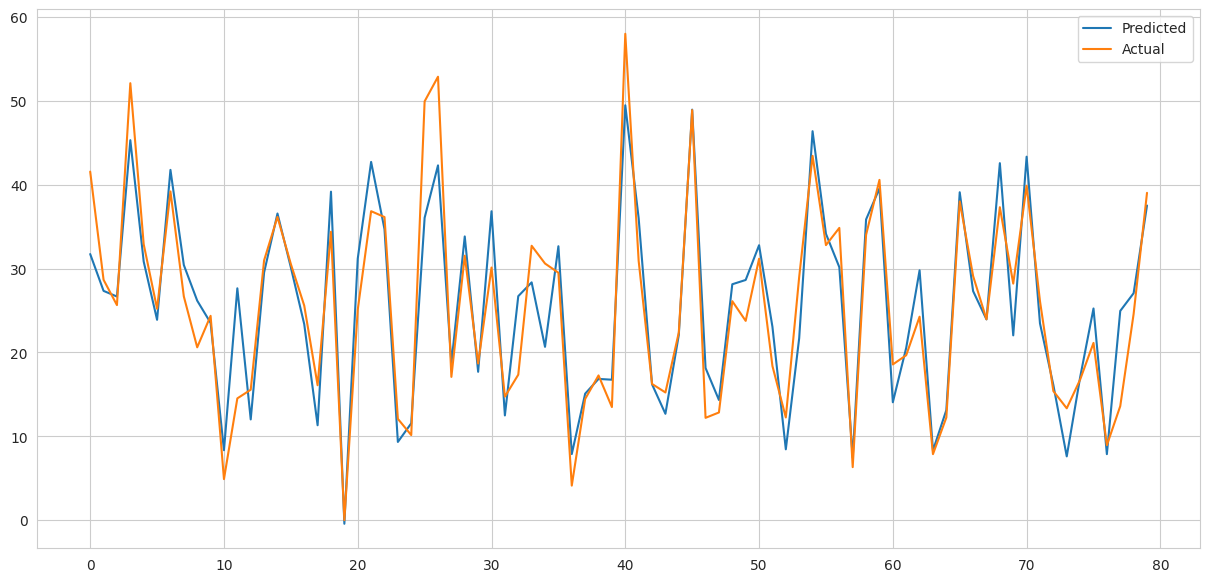

In [ ]:
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

### **Train Test split for Tree Base Models**
**because multicollinearty not effect tree base models**


In [ ]:
new_x = new_df.drop(columns = ['Rented Bike Count'])
new_y = new_df['Rented Bike Count']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.25, random_state = 42)

In [ ]:
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **XGBoost Regression**

Training score  = 0.9999999987812235
The best parameters found out to be :{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 80} 
where model best score is:  0.8354499440524685 

MAE : 162.67309804689395
MSE : 65744.02523064948
RMSE : 256.4059773691898
R2 : 0.8393356127409266
Adjusted R2 :  0.837178544578652 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


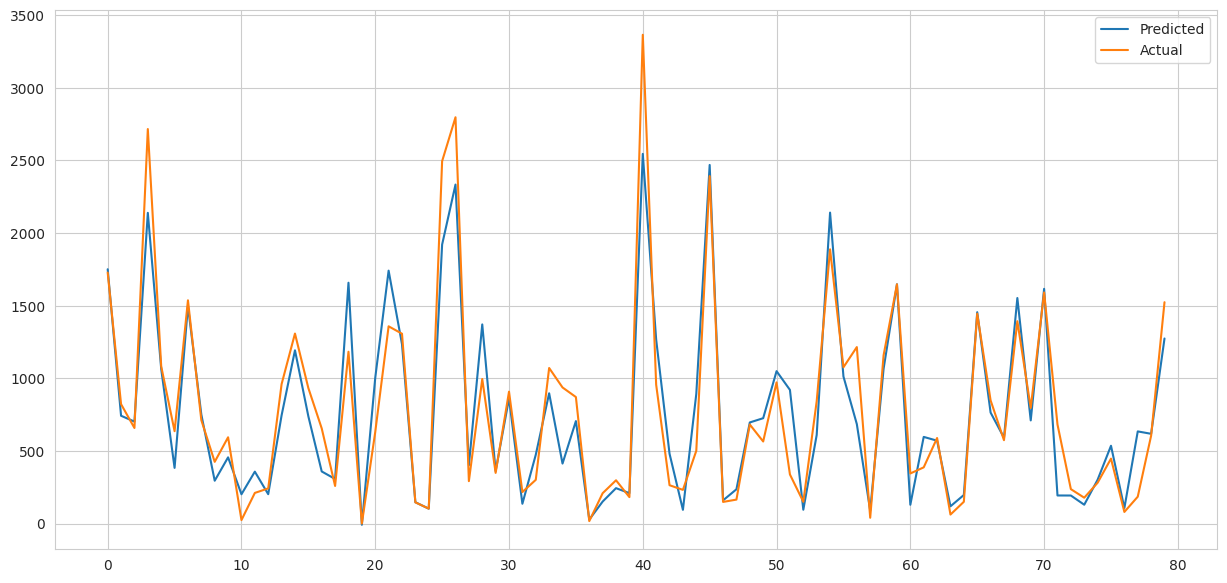

In [ ]:
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

sgb_grid_search = GridSearchCV(XGBRegressor(),param_grid=params,cv=5)
score_metrix(sgb_grid_search,x_train,x_test,y_train,y_test)

### **KNN Regressor**

Training score  = 0.8873684520023236
MAE : 182.88365296803656
MSE : 79982.99894063927
RMSE : 282.8126569668325
R2 : 0.8045385953954318
Adjusted R2 :  0.8019143450558335 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


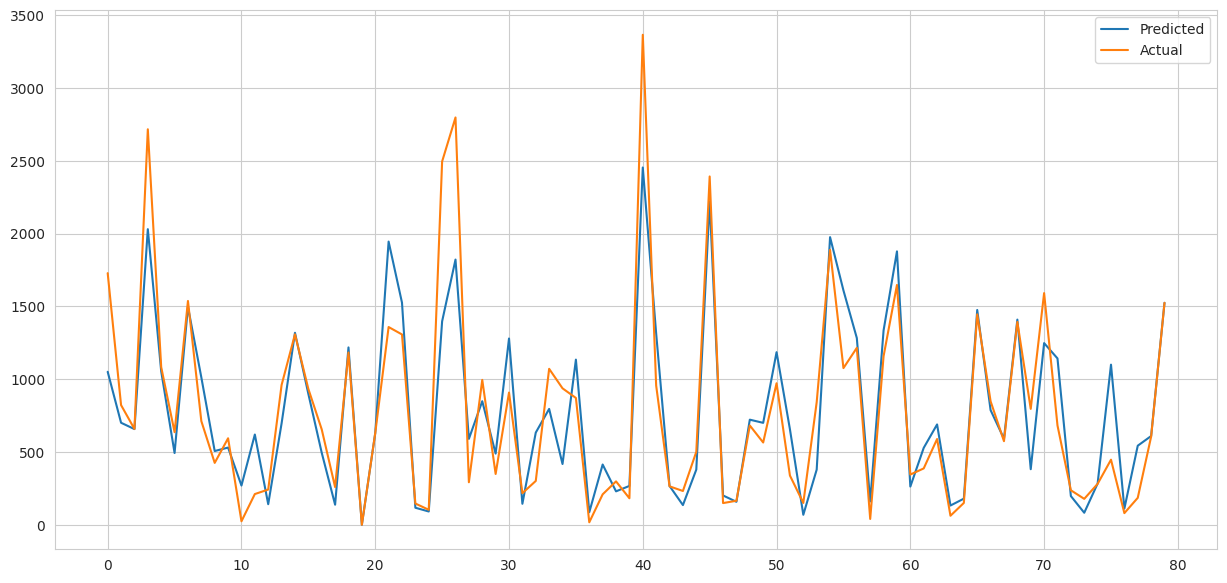

In [ ]:
knn = KNeighborsRegressor()

score_metrix(knn,x_train,x_test,y_train,y_test)

In [ ]:
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Training score  = 0.9518846403160521
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 100} 
where model best score is:  0.8578347638725752 

MAE : 155.31441425279618
MSE : 57539.38631167198
RMSE : 239.87368824377546
R2 : 0.8593860018063186
Adjusted R2 :  0.8574981286824219 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


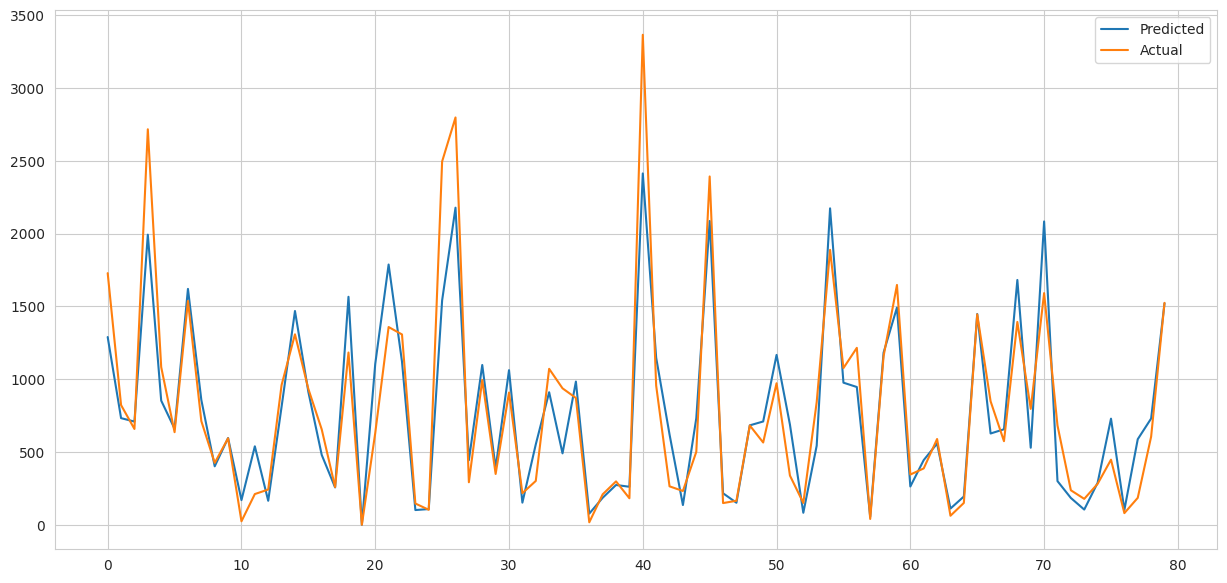

In [ ]:
score_metrix(Ranom_forest_Grid_search,x_train,x_test,y_train,y_test)